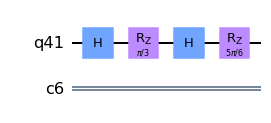

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 27 12:25:52 2020

@author: anjokann
"""

import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
#IBMQ.enable_account("7dc09d5f4c256c778af9f05a6aff8537cef51554c18822c23e4def65285f306a93f08cde425c73ec9800504501ac8c5c39e5175618cb8e885fba7d225c69bb7a")

my_provider = IBMQ.get_provider()

theta = pi/3
phi = pi/3

q = qk.QuantumRegister(1)
c = qk.ClassicalRegister(1)
qc = qk.QuantumCircuit(q,c)

qc.h(0)
qc.rz(theta,0)
qc.h(0)
qc.rz(pi/2 + phi,0)

qc.draw('mpl')



<ipython-input-11-fc9bde3d3080>:3: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc2.u3(theta,phi,0,0)


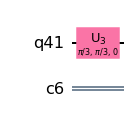

In [11]:

qc2 = qk.QuantumCircuit(q,c)

qc2.u3(theta,phi,0,0)

qc2.draw('mpl')

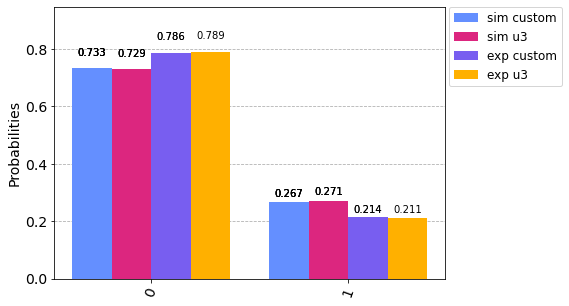

In [13]:


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(testZ,backend=backend,shots=1024)
resultSim=jobIBM.result()

backend  = my_provider.get_backend('ibmq_vigo')
jobIBM=qk.execute(testZ,backend=backend,shots=1024)
resultExp=jobIBM.result()

plot_histogram([resultSim.get_counts(testZ[0]), resultSim.get_counts(testZ[1]), resultExp.get_counts(testZ[0]), resultExp.get_counts(testZ[1])], legend = ['sim custom', 'sim u3', 'exp custom', 'exp u3'])

